In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [3]:
from scipy.stats import skew

In [4]:
train_df = pd.read_csv('../data/orignal/train.csv', index_col = 0)
test_df = pd.read_csv('../data/orignal/test.csv', index_col = 0)
combine_df = pd.concat([train_df, test_df])

In [5]:
# 相关性检测
#correlation matrix
# corrmat = train_df.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True)
# plt.show()

In [6]:
def fixSkew(feature_df, name):
    skewed_feat = skew(feature_df[name])
    if skewed_feat > 0.75:
        print('fix')
        return np.log1p(feature_df[name])
    else:
        print('notfix')
        return feature_df[name]

In [7]:
#saleprice correlation matrix
# k = 30 #number of variables for heatmap
# f, ax = plt.subplots(figsize=(16, 12))
# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# cm = np.corrcoef(train_df[cols].values.T)
# #sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [8]:
#saleprice correlation matrix
# k = 10 #number of variables for heatmap
# f, ax = plt.subplots(figsize=(5, 4))
# cols = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
# cols = cols.values.tolist()
# cols.append('SalePrice')

In [9]:
# cm = np.corrcoef(train_df[cols].values.T)
# #sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols, xticklabels=cols)
# plt.show()

### MSSubClass
涉及销售的寓所类型


In [10]:
combine_df[combine_df['MSSubClass'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,


In [11]:
combine_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

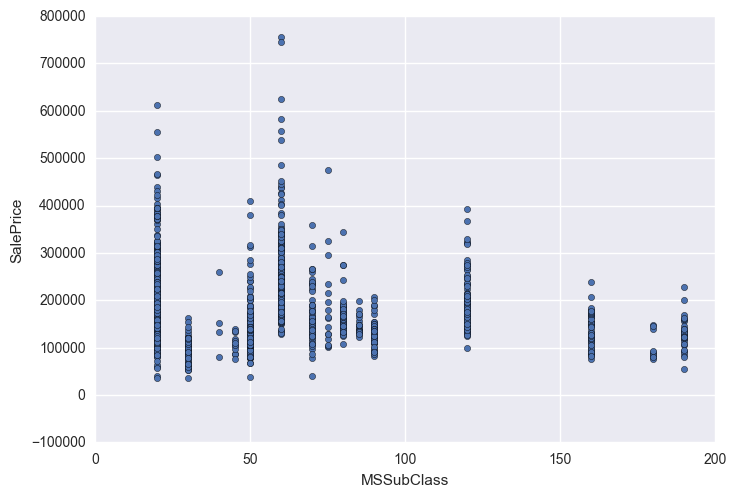

In [12]:
var = 'MSSubClass'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');
plt.show()

### MSZoning
售卖的地产区域类型

In [13]:
combine_df['MSZoning'] = combine_df['MSZoning'].fillna('RL')
le = preprocessing.LabelEncoder()
le.fit(combine_df['MSZoning'])
combine_df['MSZoningEncoder'] = le.transform(combine_df['MSZoning'])

In [14]:
combine_df['MSZoningEncoder'].value_counts()

3    2269
4     460
1     139
2      26
0      25
Name: MSZoningEncoder, dtype: int64

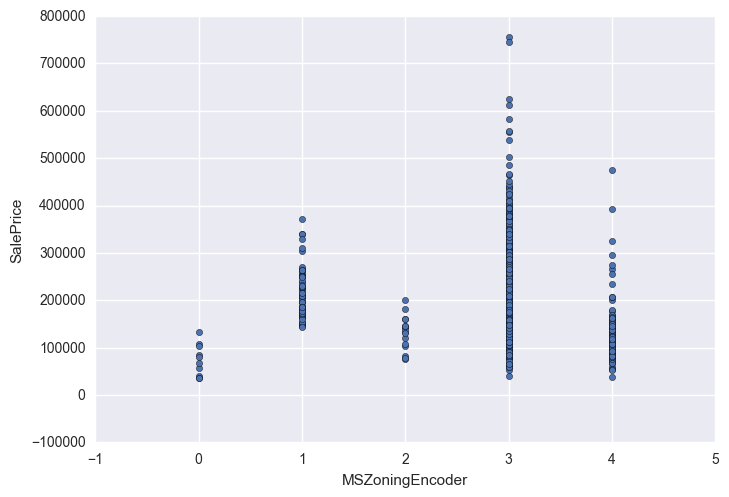

In [15]:
var = 'MSZoningEncoder'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');
plt.show()

In [16]:
mszoning_encoder_df = pd.get_dummies(combine_df['MSZoningEncoder'], prefix="MSZoningEncoder")

### LotFrontage
距离最近的街道的直线距离  
填充中位数  
数值标准化

In [17]:
lot_frontage_df = combine_df['LotFrontage'].fillna(combine_df['LotFrontage'].median())
lot_frontage_df = pd.DataFrame(preprocessing.scale(lot_frontage_df.values), np.array(range(1, 2920)), columns=['LotFrontage'])
lot_frontage_df.index.name = 'Id'

### LotArea
房产占地面积  
数值标准化

In [18]:
lot_area_df = pd.DataFrame(preprocessing.scale(combine_df['LotArea']), np.array(range(1, 2920)), columns=['LotArea'])
lot_area_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### Street
取值不平衡 丢弃该特征

In [19]:
combine_df['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

### Alley
NA值占比高于93%+
保留Alley_Access 丢弃Alley

In [20]:
combine_df['Has_Alley'] = combine_df['Alley'].apply(lambda x : 0 if pd.isnull(x) else 1)

In [21]:

combine_df['Alley'] = combine_df['Alley'].fillna('NoAccess')
le = preprocessing.LabelEncoder()
le.fit(combine_df['Alley'])
combine_df['Alley'] = le.transform(combine_df['Alley'])

In [22]:
combine_df[combine_df['Alley'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,MSZoningEncoder,Has_Alley
Id,,,,,,,,,,,,,,,,,,,,,


### LotShape
住宅的房型

In [23]:
combine_df['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [24]:

le = preprocessing.LabelEncoder()
le.fit(combine_df['LotShape'])
combine_df['LotShapeEncoder'] = le.transform(combine_df['LotShape'])

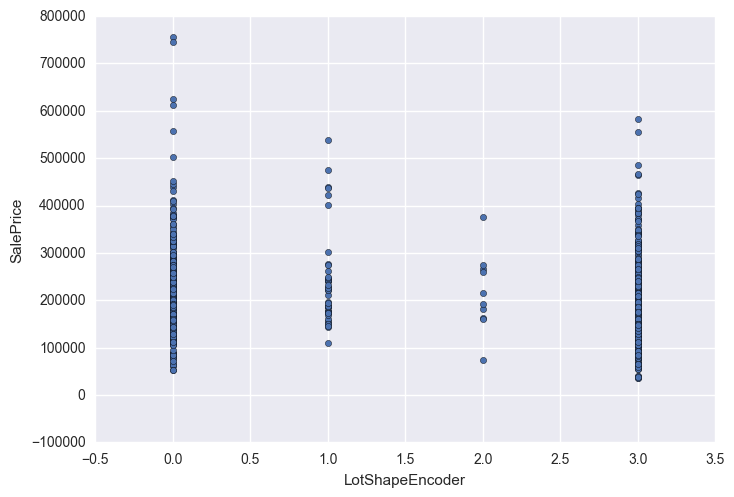

In [25]:
var = 'LotShapeEncoder'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');
plt.show()

In [26]:
lot_shape_encoder_df = pd.get_dummies(combine_df['LotShapeEncoder'], prefix="LotShapeEncoder")


### LandContour
住宅的地面是否平坦

In [27]:
combine_df['LandContour'].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [28]:
combine_df['LandContour'].value_counts()
le = preprocessing.LabelEncoder()
le.fit(combine_df['LandContour'])
combine_df['LandContourEncoder'] = le.transform(combine_df['LandContour'])

In [29]:
land_contour_encoder_df = pd.get_dummies(combine_df['LandContourEncoder'], prefix="LandContourEncoder")                                                                                                                                                                                                                                                                                                                                   

### Utilities
配套设施  
[不平衡] 丢弃

In [30]:
combine_df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

### LotConfig
住宅的地理类型

In [31]:
combine_df['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [32]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['LotConfig'])
combine_df['LotConfigEncoder'] = le.transform(combine_df['LotConfig'])

In [33]:
lot_config_encoder_df = pd.get_dummies(combine_df['LotConfigEncoder'], prefix="LotConfigEncoder")

### LandSlope
住宅的倾斜度

In [34]:
combine_df['LandSlope'].value_counts() 

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [35]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['LandSlope'])
combine_df['LandSlopeEncoder'] = le.transform(combine_df['LandSlope'])

In [36]:
land_slope_encoder_df = pd.get_dummies(combine_df['LandSlopeEncoder'], prefix="LandSlopeEncoder")

### Neighborhood
在AME城中的物理位置

In [37]:
combine_df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [38]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Neighborhood'])
combine_df['NeighborhoodEncoder'] = le.transform(combine_df['Neighborhood'])

In [39]:
neighborhood_encoder_df = pd.get_dummies(combine_df['NeighborhoodEncoder'], prefix="NeighborhoodEncoder")

### Condition1
附近的情况

In [40]:
combine_df['Condition1'].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [41]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Condition1'])
combine_df['Condition1Encoder'] = le.transform(combine_df['Condition1'])

In [42]:
condition1_encoder_df = pd.get_dummies(combine_df['Condition1Encoder'], prefix="Condition1Encoder")

### Condition2
附近的情况
太不平衡了  【丢弃】

In [43]:
combine_df['Condition2'].value_counts()

Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [44]:
# le = preprocessing.LabelEncoder()
# le.fit(combine_df['Condition2'])
# combine_df['Condition2'] = le.transform(combine_df['Condition2'])


### BldgType
住宅类型

In [45]:
combine_df['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [46]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BldgType'])
combine_df['BldgTypeEncoder'] = le.transform(combine_df['BldgType'])

In [47]:
bldg_type_encoder_df = pd.get_dummies(combine_df['BldgTypeEncoder'], prefix="BldgTypeEncoder")

### HouseStyle
住宅风格

In [48]:
combine_df['HouseStyle'].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [49]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['HouseStyle'])
combine_df['HouseStyleEncoder'] = le.transform(combine_df['HouseStyle'])


In [50]:
house_style_encoder_df = pd.get_dummies(combine_df['HouseStyleEncoder'], prefix="HouseStyleEncoder")

### OverallQual
装修覆盖率及装修完成度

In [51]:
combine_df['OverallQual'].isnull().any()

False

In [52]:
combine_df['OverallQual'].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

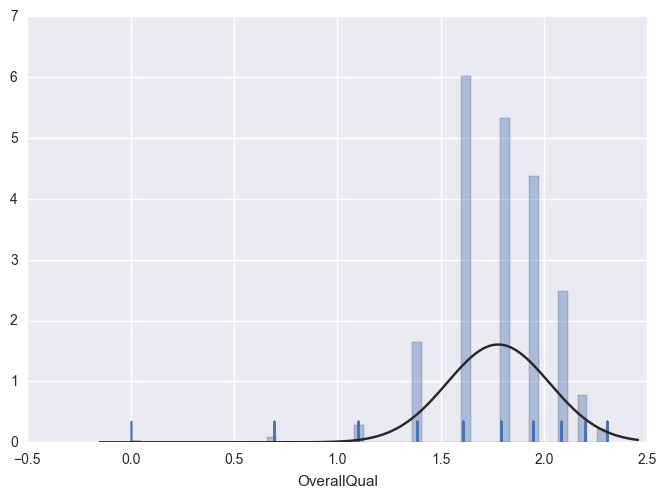

In [53]:
sns.distplot(np.log(combine_df['OverallQual']), fit=norm,  kde=False, rug=True)
fig = plt.figure()
plt.show()

In [54]:
overall_qual_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'OverallQual')), np.array(range(1, 2920)), columns=['OverallQual'])
overall_qual_df.index.name = 'Id'

notfix


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### OverallCond
住宅的整体状况

In [55]:
combine_df['OverallCond'].value_counts()

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

In [56]:
overall_cond_df = pd.DataFrame(preprocessing.scale(combine_df['OverallCond'].values), np.array(range(1, 2920)), columns=['OverallCond'])
overall_cond_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### YearBuilt
原始施工日期  
计算原始施工日到目前(2016年)总共多少年

In [57]:
combine_df['YearBuilt'] = combine_df['YearBuilt'].apply(lambda x : 2016 - x)

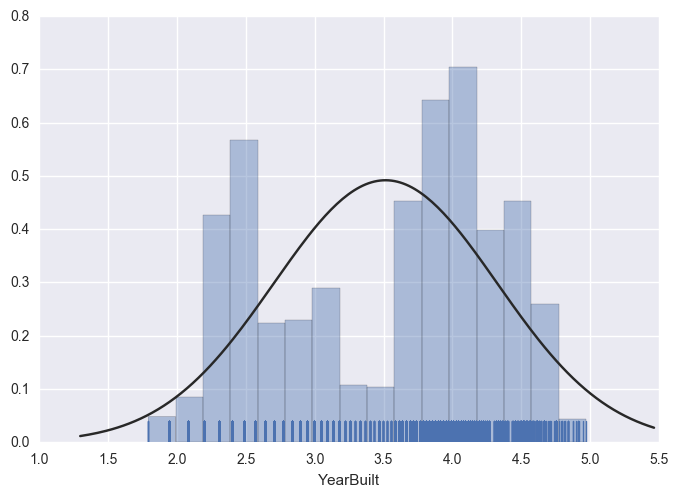

In [58]:
sns.distplot(np.log(combine_df['YearBuilt']), fit=norm,  kde=False, rug=True)
fig = plt.figure()
plt.show()

In [59]:
year_built_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'YearBuilt')), np.array(range(1, 2920)), columns=['YearBuilt'])

notfix


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### YearRemodAdd
改造时间年份
计算原始施工日到目前(2016年)总共多少年

In [60]:
combine_df['YearRemodAdd'] = pd.DataFrame(2016 - combine_df['YearRemodAdd'])

In [61]:
year_remodadd_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'YearRemodAdd')), np.array(range(1, 2920)), columns=['YearRemodAdd'])

notfix


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### RoofStyle
屋顶类型

In [62]:
combine_df['RoofStyle'].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [63]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['RoofStyle'])
combine_df['RoofStyleEncoder'] = le.transform(combine_df['RoofStyle'])


In [64]:
roof_style_encoder_df = pd.get_dummies(combine_df['RoofStyleEncoder'], prefix="RoofStyleEncoder")

### RoofMatl
屋顶材料[不平衡]

In [65]:
combine_df['RoofMatl'].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

In [66]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['RoofMatl'])
combine_df['RoofMatlEncoder'] = le.transform(combine_df['RoofMatl'])


In [67]:
roof_matl_encoder_df = pd.get_dummies(combine_df['RoofMatlEncoder'], prefix="RoofMatlEncoder")

### Exterior1st
房子的外观

In [72]:
combine_df['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [73]:
combine_df['Exterior1st'] = combine_df['Exterior1st'].fillna('VinylSd')

In [74]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Exterior1st'])
combine_df['Exterior1stEncoder'] = le.transform(combine_df['Exterior1st'])

In [75]:
exterior1st_encoder_df = pd.get_dummies(combine_df['Exterior1stEncoder'], prefix="Exterior1stEncoder")

### Exterior2nd
房子的外观

In [76]:
combine_df['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [77]:
combine_df['Exterior2nd'] = combine_df['Exterior2nd'].fillna('VinylSd')
le = preprocessing.LabelEncoder()
le.fit(combine_df['Exterior2nd'])
combine_df['Exterior2ndEncoder'] = le.transform(combine_df['Exterior2nd'])

In [78]:
exterior2nd_encoder_df = pd.get_dummies(combine_df['Exterior2ndEncoder'], prefix="Exterior2ndEncoder")

### MasVnrType
表层砌体类型

In [79]:
combine_df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [80]:
combine_df['MasVnrType'] = combine_df['MasVnrType'].fillna('None')
le = preprocessing.LabelEncoder()
le.fit(combine_df['MasVnrType'])
combine_df['MasVnrTypeEncoder'] = le.transform(combine_df['MasVnrType'])

In [81]:
masvnrtype_encoder_df = pd.get_dummies(combine_df['MasVnrTypeEncoder'], prefix="MasVnrTypeEncoder")

### MasVnrArea
表层砌面面积

In [82]:
combine_df['MasVnrArea'] = combine_df['MasVnrArea'].fillna(combine_df['MasVnrArea'].median())
mas_vnr_area_df = pd.DataFrame(preprocessing.scale(combine_df['MasVnrArea']), np.array(range(1, 2920)), columns=['MasVnrArea'])
mas_vnr_area_df.index.name = 'Id'

### ExterQual
外观材料质量

In [83]:
combine_df['ExterQual'].isnull().any()

False

In [84]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['ExterQual'])
combine_df['ExterQualEncoder'] = le.transform(combine_df['ExterQual'])

In [85]:
exter_qual_encoder = pd.get_dummies(combine_df['ExterQualEncoder'], prefix="ExterQualEncoder")

### ExterCond
外部材料现状

In [86]:
combine_df['ExterCond'].isnull().any()

False

In [87]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['ExterCond'])
combine_df['ExterCondEncoder'] = le.transform(combine_df['ExterCond'])

In [88]:
exter_cond_encoder = pd.get_dummies(combine_df['ExterCondEncoder'], prefix="ExterCondEncoder")

### Foundation
地基类型

In [89]:
combine_df['Foundation'].isnull().any()

False

In [90]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Foundation'])
combine_df['FoundationEncoder'] = le.transform(combine_df['Foundation'])

In [91]:
foundation_encoder = pd.get_dummies(combine_df['FoundationEncoder'], prefix="FoundationEncoder")

### Bsmt
是否有地下室

In [92]:
combine_df['Has_Bsmt'] = combine_df['BsmtQual'].apply(lambda x : 0 if pd.isnull(x) else 1)

### BsmtQual
地下室高度

In [93]:
combine_df['BsmtQual'] = combine_df['BsmtQual'].fillna('No_Bsmt')

In [94]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BsmtQual'])
combine_df['BsmtQualEncoder'] = le.transform(combine_df['BsmtQual'])

In [95]:
bsmt_qual_encoder = pd.get_dummies(combine_df['BsmtQualEncoder'], prefix="BsmtQualEncoder")

### BsmtCond
地下室的环境条件

In [96]:
combine_df['BsmtCond'] = combine_df['BsmtCond'].fillna('No_Bsmt')

In [97]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BsmtCond'])
combine_df['BsmtCondEncoder'] = le.transform(combine_df['BsmtCond'])

In [98]:
bsmt_cond_encoder = pd.get_dummies(combine_df['BsmtCondEncoder'], prefix="BsmtQualEncoder")

### BsmtExposure
光照条件

In [99]:
combine_df['BsmtExposure'] = combine_df['BsmtExposure'].fillna('No_Bsmt')

In [100]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BsmtExposure'])
combine_df['BsmtExposureEncoder'] = le.transform(combine_df['BsmtExposure'])

In [101]:
bsmt_exposure_encoder = pd.get_dummies(combine_df['BsmtExposureEncoder'], prefix="BsmtExposureEncoder")

### BsmtFinType1
地下室装修完成度

In [102]:
combine_df['BsmtFinType1'] = combine_df['BsmtFinType1'].fillna('No_Bsmt')

In [103]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BsmtFinType1'])
combine_df['BsmtFinType1Encoder'] = le.transform(combine_df['BsmtFinType1'])

In [104]:
bsmt_fin_type1_encoder = pd.get_dummies(combine_df['BsmtFinType1Encoder'], prefix="BsmtFinType1Encoder")

### BsmtFinSF1
Type1完成的面积

In [105]:
combine_df['BsmtFinSF1'] = combine_df['BsmtFinSF1'].fillna(0)

In [106]:
bsmt_fin_SF1_df = pd.DataFrame(preprocessing.scale(combine_df['BsmtFinSF1']), np.array(range(1, 2920)), columns=['BsmtFinSF1'])
bsmt_fin_SF1_df.index.name = 'Id'

### BsmtFinType2
地下室装修完成度

In [107]:
combine_df['BsmtFinType2'] = combine_df['BsmtFinType2'].fillna('No_Bsmt')

In [108]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BsmtFinType2'])
combine_df['BsmtFinType2Encoder'] = le.transform(combine_df['BsmtFinType2'])

In [109]:
bsmt_fin_type2_encoder = pd.get_dummies(combine_df['BsmtFinType2Encoder'], prefix="BsmtFinType2Encoder")

### BsmtFinSF2
Type2完成的面积

In [110]:
combine_df['BsmtFinSF2'] = combine_df['BsmtFinSF2'].fillna(0)

In [111]:
bsmt_fin_SF2_df = pd.DataFrame(preprocessing.scale(combine_df['BsmtFinSF2']), np.array(range(1, 2920)), columns=['BsmtFinSF2'])
bsmt_fin_SF2_df.index.name = 'Id'

### BsmtUnfSF
未完成的地下室面积

In [112]:
combine_df[combine_df['BsmtUnfSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,MasVnrTypeEncoder,ExterQualEncoder,ExterCondEncoder,FoundationEncoder,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder
Id,,,,,,,,,,,,,,,,,,,,,
2121,896,0,0,1,2,1Fam,No_Bsmt,No_Bsmt,0.0,0.0,...,2,3,4,2,0,3,2,4,4,4


In [113]:
combine_df.ix[2121, 'BsmtUnfSF'] = 0

In [114]:
bsmt_unf_sf_df = pd.DataFrame(preprocessing.scale(combine_df['BsmtUnfSF']), np.array(range(1, 2920)), columns=['BsmtUnfSF'])
bsmt_unf_sf_df.index.name = 'Id'

### TotalBsmtSF
地下室总面积

In [115]:
combine_df[combine_df['TotalBsmtSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,MasVnrTypeEncoder,ExterQualEncoder,ExterCondEncoder,FoundationEncoder,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder
Id,,,,,,,,,,,,,,,,,,,,,
2121,896,0,0,1,2,1Fam,No_Bsmt,No_Bsmt,0.0,0.0,...,2,3,4,2,0,3,2,4,4,4


In [116]:
combine_df.ix[2121, 'TotalBsmtSF'] = 0

In [117]:
total_bsmt_sf_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'TotalBsmtSF')), np.array(range(1, 2920)), columns=['TotalBsmtSF'])
total_bsmt_sf_df.index.name = 'Id'

fix


In [118]:
### GrLivArea


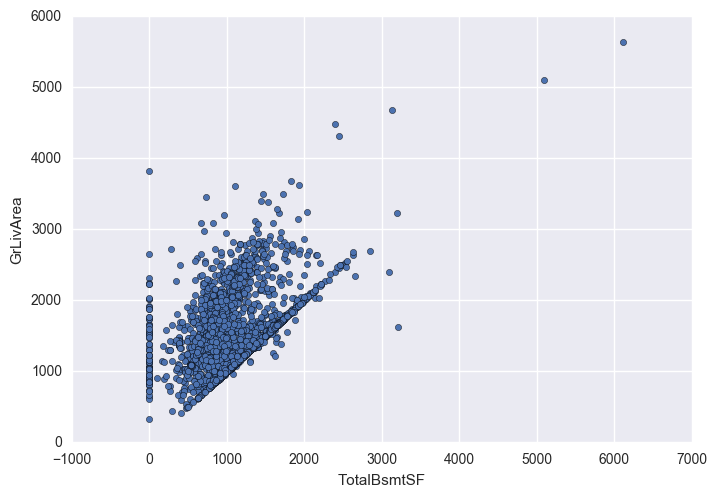

In [119]:
var = 'TotalBsmtSF'
data = pd.concat([combine_df['GrLivArea'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='GrLivArea');
plt.show()

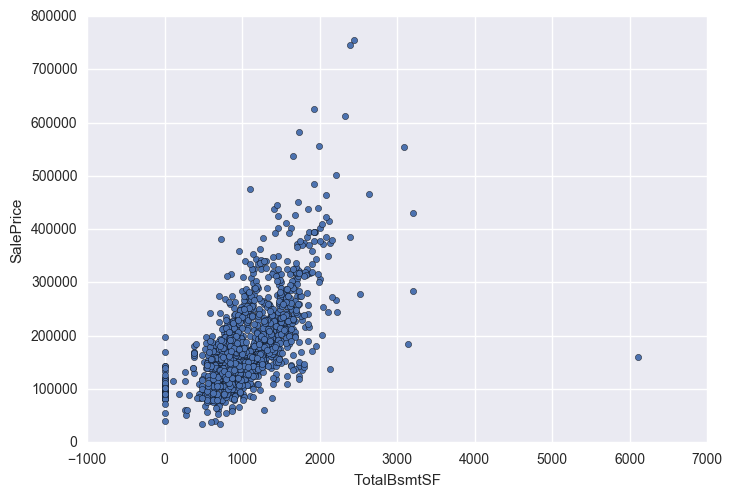

In [120]:
var = 'TotalBsmtSF'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
plt.show()

### Heating
供暖类型

In [121]:
combine_df[combine_df['Heating'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,MasVnrTypeEncoder,ExterQualEncoder,ExterCondEncoder,FoundationEncoder,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder
Id,,,,,,,,,,,,,,,,,,,,,


In [122]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Heating'])
combine_df['HeatingEncoder'] = le.transform(combine_df['Heating'])

In [123]:
heating_encoder = pd.get_dummies(combine_df['HeatingEncoder'], prefix="HeatingEncoder")

### HeatingQC
供暖效果

In [124]:
combine_df[combine_df['HeatingQC'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ExterQualEncoder,ExterCondEncoder,FoundationEncoder,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [125]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['HeatingQC'])
combine_df['HeatingQCEncoder'] = le.transform(combine_df['HeatingQC'])

In [126]:
heating_qc_encoder = pd.get_dummies(combine_df['HeatingQCEncoder'], prefix="HeatingQCEncoder")

### CentralAir
中央空调

In [127]:
combine_df[combine_df['CentralAir'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ExterCondEncoder,FoundationEncoder,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [128]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['CentralAir'])
combine_df['CentralAirEncoder'] = le.transform(combine_df['CentralAir'])

In [129]:
central_air_encoder = pd.get_dummies(combine_df['CentralAirEncoder'], prefix="CentralAirEncoder")

### Electrical
电力系统

In [130]:
combine_df[combine_df['Electrical'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,FoundationEncoder,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder
Id,,,,,,,,,,,,,,,,,,,,,
1380,754,640,0,1,3,1Fam,TA,No,0.0,0.0,...,2,1,2,4,3,6,6,1,2,1


In [131]:
combine_df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [132]:
combine_df.ix[1380, 'Electrical'] = 'SBrkr'

In [133]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Electrical'])
combine_df['ElectricalEncoder'] = le.transform(combine_df['Electrical'])

In [134]:
electrical_encoder = pd.get_dummies(combine_df['ElectricalEncoder'], prefix="ElectricalEncoder")

### 1stFlrSF
一楼面积

In [135]:
combine_df[combine_df['1stFlrSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [136]:
fst_flr_sf_df = pd.DataFrame(preprocessing.scale(combine_df['1stFlrSF']), np.array(range(1, 2920)), columns=['1stFlrSF'])
fst_flr_sf_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### 2ndFlrSF
二楼面积

In [137]:
combine_df[combine_df['2ndFlrSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [138]:
snd_flr_sf_df = pd.DataFrame(preprocessing.scale(combine_df['2ndFlrSF']), np.array(range(1, 2920)), columns=['2ndFlrSF'])
snd_flr_sf_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### LowQualFinSF
低质量完成的面积

In [139]:
combine_df[combine_df['LowQualFinSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [140]:
low_qual_fin_sf_df = pd.DataFrame(preprocessing.scale(combine_df['LowQualFinSF']), np.array(range(1, 2920)), columns=['LowQualFinSF'])
low_qual_fin_sf_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### GrLivArea
地面以上居住面积

In [141]:
combine_df[combine_df['GrLivArea'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [142]:
gr_liv_area_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'GrLivArea')), np.array(range(1, 2920)), columns=['GrLivArea'])
gr_liv_area_df.index.name = 'Id'

fix


In [143]:
var = 'GrLivArea'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

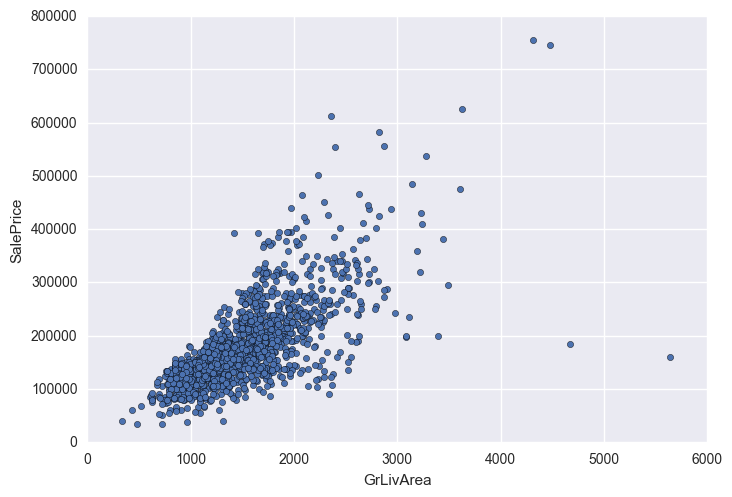

In [144]:
plt.show()

In [145]:
data[(data['SalePrice'] < 200000) & (data['GrLivArea'] > 4000)]

,SalePrice,GrLivArea
Id,,
524,184750.0,4676
1299,160000.0,5642


### BsmtFullBath
地下室全浴室

In [146]:
combine_df[combine_df['BsmtFullBath'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,
2121,896,0,0,1,2,1Fam,No_Bsmt,No_Bsmt,0.0,0.0,...,0,3,2,4,4,4,1,4,1,0
2189,3820,0,0,1,5,1Fam,No_Bsmt,No_Bsmt,0.0,0.0,...,0,3,2,4,4,4,1,4,1,4


In [147]:
combine_df['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [148]:
combine_df.ix[2121, 'Has_Bsmt']

0

In [149]:
combine_df.ix[2189, 'Has_Bsmt']

0

In [150]:
combine_df['BsmtFullBath'] = combine_df['BsmtFullBath'].fillna(0).astype(np.int)

### BsmtHalfBath
底下室半浴室

In [151]:
combine_df[combine_df['BsmtHalfBath'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,
2121,896,0,0,1,2,1Fam,No_Bsmt,No_Bsmt,0.0,0.0,...,0,3,2,4,4,4,1,4,1,0
2189,3820,0,0,1,5,1Fam,No_Bsmt,No_Bsmt,0.0,0.0,...,0,3,2,4,4,4,1,4,1,4


In [152]:
combine_df['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [153]:
combine_df['BsmtHalfBath'] = combine_df['BsmtHalfBath'].fillna(0).astype(np.int)

### FullBath
地上全浴室个数

In [154]:
combine_df[combine_df['FullBath'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [155]:
combine_df['FullBath'].value_counts()

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

### HalfBath
地上半浴室个数

In [156]:
combine_df[combine_df['HalfBath'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [157]:
combine_df['HalfBath'].value_counts()

0    1834
1    1060
2      25
Name: HalfBath, dtype: int64

### BedroomAbvGr
地上卧室

In [158]:
combine_df[combine_df['BedroomAbvGr'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [159]:
combine_df['BedroomAbvGr'].value_counts()

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

### KitchenAbvGr
地上厨房

In [160]:
combine_df[combine_df['KitchenAbvGr'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [161]:
combine_df['KitchenAbvGr'].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

### KitchenQual
厨房质量

In [162]:
combine_df[combine_df['KitchenQual'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Bsmt,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder
Id,,,,,,,,,,,,,,,,,,,,,
1556,725,499,0,1,3,1Fam,Fa,No,0.0,0.0,...,1,2,0,3,6,6,1,2,0,4


In [163]:
combine_df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [164]:
combine_df.ix[1556, 'KitchenQual'] = 'TA'

In [165]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['KitchenQual'])
combine_df['KitchenQualEncoder'] = le.transform(combine_df['KitchenQual'])

In [166]:
kitchen_qual_encoder = pd.get_dummies(combine_df['KitchenQualEncoder'], prefix="KitchenQualEncoder")

### TotRmsAbvGrd
地上的房间总数量

In [167]:
combine_df[combine_df['TotRmsAbvGrd'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder,KitchenQualEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [168]:
combine_df['TotRmsAbvGrd'].value_counts()

6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
15      1
13      1
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

### Functional
家庭功能

In [169]:
combine_df[combine_df['Functional'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,BsmtQualEncoder,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder,KitchenQualEncoder
Id,,,,,,,,,,,,,,,,,,,,,
2217,733,0,0,1,2,1Fam,No_Bsmt,No_Bsmt,0.0,0.0,...,3,2,4,4,4,5,3,0,0,1
2474,866,504,0,0,3,1Fam,Fa,No,0.0,0.0,...,4,0,3,6,6,1,1,1,4,3


In [170]:
combine_df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [171]:
combine_df.ix[2217, 'Functional'] = 'Typ'
combine_df.ix[2474, 'Functional'] = 'Typ'

In [172]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Functional'])
combine_df['FunctionalEncoder'] = le.transform(combine_df['Functional'])

In [173]:
funcational_encoder = pd.get_dummies(combine_df['FunctionalEncoder'], prefix="FunctionalEncoder")

### Fireplaces
壁炉数量

In [174]:
combine_df[combine_df['Fireplaces'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,BsmtCondEncoder,BsmtExposureEncoder,BsmtFinType1Encoder,BsmtFinType2Encoder,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [175]:
combine_df['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

###  HasFireplace
是否有壁炉

In [176]:
combine_df['Has_Fireplace'] = combine_df['FireplaceQu'].apply(lambda x : 0 if pd.isnull(x) else 1)

###  FireplaceQu
壁炉质量

In [177]:
combine_df['FireplaceQu'] = combine_df['FireplaceQu'].fillna('No_Fp')

In [178]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['FireplaceQu'])
combine_df['FireplaceQuEncoder'] = le.transform(combine_df['FireplaceQu'])

In [179]:
fireplace_qu_encoder = pd.get_dummies(combine_df['FireplaceQuEncoder'], prefix="FireplaceQuEncoder")

### Has_GarageType
是否有车库、

In [180]:
combine_df['Has_Garage'] = combine_df['GarageType'].apply(lambda x : 0 if pd.isnull(x) else 1)

In [181]:
combine_df.ix[2127, 'Has_Garage'] = 0
combine_df.ix[2577, 'Has_Garage'] = 0

### GarageType
车库所在位置

In [182]:
type_df = combine_df[combine_df['GarageType'].isnull()]

In [183]:
combine_df['GarageType'] = combine_df['GarageType'].fillna('No_GT')
combine_df.ix[2127, 'GarageType'] = 'No_GT'
combine_df.ix[2577, 'GarageType'] = 'No_GT'

In [184]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['GarageType'])
combine_df['GarageTypeEncoder'] = le.transform(combine_df['GarageType'])

In [185]:
garage_type_encoder = pd.get_dummies(combine_df['GarageTypeEncoder'], prefix="GarageTypeEncoder")

### GarageYrBlt
车库建造年份

In [186]:
yt_df = combine_df[combine_df['GarageYrBlt'].isnull()]

In [187]:
set(yt_df.index) - set(type_df.index)

{2127, 2577}

In [188]:
combine_df['GarageYrBlt'] = combine_df['GarageYrBlt'].fillna(2016)

In [255]:
combine_df['GarageYrBlt'] = 2016 - combine_df['GarageYrBlt']

### GarageCars
车库能停几辆车

In [190]:
combine_df[combine_df['GarageCars'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder
Id,,,,,,,,,,,,,,,,,,,,,
2577,942,886,0,1,3,1Fam,TA,No,548.0,0.0,...,1,0,1,4,2,6,0,3,0,6


In [191]:
combine_df['GarageCars'].median()

2.0

In [192]:
combine_df.ix[2577, 'GarageCars'] = 0

In [193]:
garage_cars_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'GarageCars')), np.array(range(1, 2920)), columns=['GarageCars'])
garage_cars_df.index.name = 'Id'

notfix


In [194]:
var = 'GarageCars'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

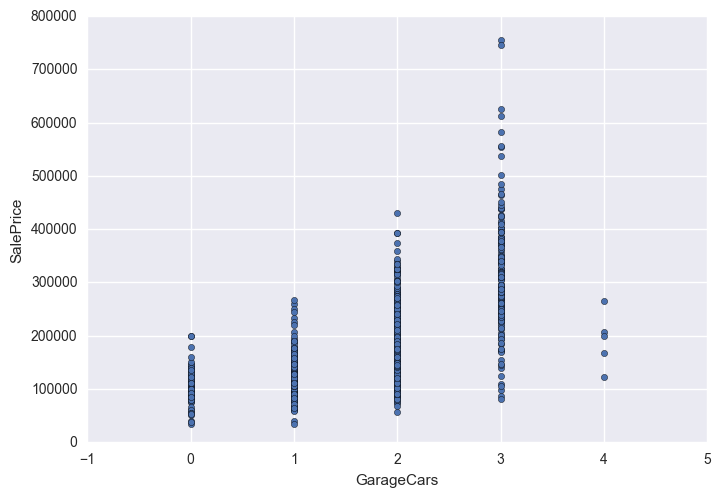

In [195]:
plt.show()

### GarageArea
车库面积

In [196]:
combine_df[combine_df['GarageArea'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder
Id,,,,,,,,,,,,,,,,,,,,,
2577,942,886,0,1,3,1Fam,TA,No,548.0,0.0,...,1,0,1,4,2,6,0,3,0,6


In [197]:
combine_df.ix[2577, 'GarageArea'] = 0

In [198]:
garage_area_df = pd.DataFrame(preprocessing.scale(combine_df['GarageArea']), np.array(range(1, 2920)), columns=['GarageArea'])
garage_area_df.index.name = 'Id'

### GarageQual
车库质量

In [199]:
combine_df[combine_df['GarageQual'].isnull() & (combine_df['Has_Garage'] == 1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,HeatingEncoder,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [200]:
combine_df['GarageQual'] = combine_df['GarageQual'].fillna('No_GT')

In [201]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['GarageQual'])
combine_df['GarageQualEncoder'] = le.transform(combine_df['GarageQual'])

In [202]:
garage_qual_encoder = pd.get_dummies(combine_df['GarageQualEncoder'], prefix="GarageQualEncoder")

### GarageCond
车库条件

In [203]:
combine_df[combine_df['GarageCond'].isnull() & (combine_df['Has_Garage'] == 1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,HeatingQCEncoder,CentralAirEncoder,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [204]:
combine_df['GarageCond'] = combine_df['GarageQual'].fillna('No_GT')

In [205]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['GarageCond'])
combine_df['GarageCondEncoder'] = le.transform(combine_df['GarageCond'])

In [206]:
garage_cond_encoder = pd.get_dummies(combine_df['GarageCondEncoder'], prefix="GarageCondEncoder")

### PavedDrive
汽车开的道路情况

In [207]:
combine_df[combine_df['PavedDrive'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,CentralAirEncoder,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [208]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['PavedDrive'])
combine_df['PavedDriveEncoder'] = le.transform(combine_df['PavedDrive'])

In [209]:
paved_drive_encoder = pd.get_dummies(combine_df['PavedDriveEncoder'], prefix="PavedDriveEncoder")

### WoodDeckSF
木甲板面积平方英尺


In [210]:
combine_df[combine_df['WoodDeckSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [211]:
wood_deck_df = pd.DataFrame(preprocessing.scale(combine_df['WoodDeckSF']), np.array(range(1, 2920)), columns=['WoodDeckSF'])
wood_deck_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### OpenPorchSF
开放玄关面积平方英尺

In [212]:
combine_df[combine_df['OpenPorchSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [213]:
open_porch_sf_df = pd.DataFrame(preprocessing.scale(combine_df['OpenPorchSF']), np.array(range(1, 2920)), columns=['OpenPorchSF'])
open_porch_sf_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### EnclosedPorch
封闭走廊地区平方英尺

In [214]:
combine_df[combine_df['EnclosedPorch'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [215]:
enclose_porch_df = pd.DataFrame(preprocessing.scale(combine_df['EnclosedPorch']), np.array(range(1, 2920)), columns=['EnclosedPorch'])
enclose_porch_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### 3SsnPorch
三面玄关面积平方英尺

In [216]:
combine_df[combine_df['3SsnPorch'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [217]:
three_ssn_porch_df = pd.DataFrame(preprocessing.scale(combine_df['3SsnPorch']), np.array(range(1, 2920)), columns=['3SsnPorch'])
three_ssn_porch_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### ScreenPorch
窗口玄关面积平方英尺

In [218]:
combine_df[combine_df['ScreenPorch'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ElectricalEncoder,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [219]:
screen_porch_df = pd.DataFrame(preprocessing.scale(combine_df['ScreenPorch']), np.array(range(1, 2920)), columns=['ScreenPorch'])
screen_porch_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### Has_Pool
是否有游泳池

In [220]:
combine_df['Has_Pool'] = combine_df['PoolArea'].apply(lambda x:0 if x == 0 else 1 )

### PoolArea
游泳池面积

In [221]:
combine_df[combine_df['PoolArea'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder,Has_Pool
Id,,,,,,,,,,,,,,,,,,,,,


In [222]:
pool_area_df = pd.DataFrame(preprocessing.scale(combine_df['PoolArea']), np.array(range(1, 2920)), columns=['PoolArea'])
pool_area_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### PoolQC
游泳池质量

In [223]:
combine_df[combine_df['PoolQC'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,KitchenQualEncoder,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder,Has_Pool
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,1,3,1Fam,TA,No,706.0,0.0,...,2,6,0,3,1,1,5,5,2,0
2,1262,0,0,1,3,1Fam,TA,Gd,978.0,0.0,...,3,6,1,5,1,1,5,5,2,0
3,920,866,0,1,3,1Fam,TA,Mn,486.0,0.0,...,2,6,1,5,1,1,5,5,2,0
4,961,756,0,1,3,1Fam,Gd,No,216.0,0.0,...,2,6,1,2,1,5,5,5,2,0
5,1145,1053,0,1,4,1Fam,TA,Av,655.0,0.0,...,2,6,1,5,1,1,5,5,2,0
6,796,566,320,1,1,1Fam,TA,No,732.0,0.0,...,3,6,0,3,1,1,5,5,2,0
7,1694,0,0,1,3,1Fam,TA,Av,1369.0,0.0,...,2,6,1,2,1,1,5,5,2,0
8,1107,983,0,1,3,1Fam,TA,Mn,859.0,32.0,...,3,6,1,5,1,1,5,5,2,0
9,1022,752,0,1,2,1Fam,TA,No,0.0,0.0,...,3,2,1,5,1,5,1,1,2,0


In [224]:
combine_df['PoolQC'] = combine_df['PoolQC'].fillna('No_Pool')

In [225]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['PoolQC'])
combine_df['PoolQCEncoder'] = le.transform(combine_df['PoolQC'])

In [226]:
pool_qc_encoder = pd.get_dummies(combine_df['PoolQCEncoder'], prefix="PoolQCEncoder")

### Fence
栅栏质量

In [227]:
combine_df[combine_df['Fence'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,FunctionalEncoder,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder,Has_Pool,PoolQCEncoder
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,1,3,1Fam,TA,No,706.0,0.0,...,6,0,3,1,1,5,5,2,0,3
2,1262,0,0,1,3,1Fam,TA,Gd,978.0,0.0,...,6,1,5,1,1,5,5,2,0,3
3,920,866,0,1,3,1Fam,TA,Mn,486.0,0.0,...,6,1,5,1,1,5,5,2,0,3
4,961,756,0,1,3,1Fam,Gd,No,216.0,0.0,...,6,1,2,1,5,5,5,2,0,3
5,1145,1053,0,1,4,1Fam,TA,Av,655.0,0.0,...,6,1,5,1,1,5,5,2,0,3
7,1694,0,0,1,3,1Fam,TA,Av,1369.0,0.0,...,6,1,2,1,1,5,5,2,0,3
8,1107,983,0,1,3,1Fam,TA,Mn,859.0,32.0,...,6,1,5,1,1,5,5,2,0,3
9,1022,752,0,1,2,1Fam,TA,No,0.0,0.0,...,2,1,5,1,5,1,1,2,0,3
10,1077,0,0,1,2,2fmCon,TA,No,851.0,0.0,...,6,1,5,1,1,2,2,2,0,3


In [228]:
combine_df['Fence'] = combine_df['Fence'].fillna('No_Fence')

In [229]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Fence'])
combine_df['FenceEncoder'] = le.transform(combine_df['Fence'])

In [230]:
fence_encoder = pd.get_dummies(combine_df['FenceEncoder'], prefix="FenceEncoder")

### MoSold
销售的月份


In [231]:
combine_df[combine_df['MoSold'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder,Has_Pool,PoolQCEncoder,FenceEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [232]:
combine_df['MoSold'].value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

In [233]:
mo_sold_encoder = pd.get_dummies(combine_df['MoSold'], prefix="MoSoldEncoder")

### YrSold
销售的年份

In [234]:
combine_df[combine_df['YrSold'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder,Has_Pool,PoolQCEncoder,FenceEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [235]:
combine_df['YrSold'].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [236]:
yr_sold_encoder = pd.get_dummies(combine_df['YrSold'], prefix="YrSoldEncoder")

### SaleType
销售的类型

In [237]:
combine_df[combine_df['SaleType'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Has_Fireplace,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder,Has_Pool,PoolQCEncoder,FenceEncoder
Id,,,,,,,,,,,,,,,,,,,,,
2490,1176,0,0,1,3,1Fam,TA,Mn,190.0,873.0,...,1,2,1,1,5,5,2,0,3,4


In [238]:
combine_df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [239]:
combine_df.ix[2490, 'SaleType'] = 'WD'

In [240]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['SaleType'])
combine_df['SaleTypeEncoder'] = le.transform(combine_df['SaleType'])

In [241]:
sale_type_encoder = pd.get_dummies(combine_df['SaleTypeEncoder'], prefix="SaleTypeEncoder")

### SaleCondition
销售条件

In [242]:
combine_df[combine_df['SaleCondition'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,FireplaceQuEncoder,Has_Garage,GarageTypeEncoder,GarageQualEncoder,GarageCondEncoder,PavedDriveEncoder,Has_Pool,PoolQCEncoder,FenceEncoder,SaleTypeEncoder
Id,,,,,,,,,,,,,,,,,,,,,


In [243]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['SaleCondition'])
combine_df['SaleConditionEncoder'] = le.transform(combine_df['SaleCondition'])

In [244]:
sale_condition_encoder = pd.get_dummies(combine_df['SaleConditionEncoder'], prefix="SaleConditionEncoder")

In [245]:
###  MiscFeature
#另外一些特征

#### 排除的特征 
【Street】：不平衡  
【Utilities】：不平衡  
【Condition2】：不平衡

### 特征合并
合并所有特征   
分离训练集和测试集

In [256]:
process_df = pd.get_dummies(combine_df['MSSubClass'], prefix="MSSubClass")
process_df = pd.merge(process_df, mszoning_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, lot_frontage_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, lot_area_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, lot_shape_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, land_contour_encoder_df, left_index=True, right_index=True)


process_df = pd.merge(process_df, lot_config_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, land_slope_encoder_df, left_index=True, right_index=True)


process_df = pd.merge(process_df, neighborhood_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, condition1_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, bldg_type_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, house_style_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, house_style_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, overall_qual_df, left_index=True, right_index=True)
process_df = pd.merge(process_df, overall_cond_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, year_built_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, year_remodadd_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, roof_style_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, roof_matl_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, exterior1st_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, exterior1st_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, exterior2nd_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, masvnrtype_encoder_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, mas_vnr_area_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, exter_qual_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, exter_cond_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, foundation_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['Has_Bsmt']), left_index=True, right_index=True)

process_df = pd.merge(process_df, bsmt_qual_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, bsmt_fin_type1_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, bsmt_fin_SF1_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, bsmt_fin_type2_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, bsmt_fin_SF2_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, bsmt_unf_sf_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, total_bsmt_sf_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, heating_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, heating_qc_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, central_air_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, electrical_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, fst_flr_sf_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, low_qual_fin_sf_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, gr_liv_area_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['BsmtFullBath']), left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['BsmtHalfBath']), left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['FullBath']), left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['HalfBath']), left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['HalfBath']), left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['BedroomAbvGr']), left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['KitchenAbvGr']), left_index=True, right_index=True)

process_df = pd.merge(process_df, kitchen_qual_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['TotRmsAbvGrd']), left_index=True, right_index=True)

process_df = pd.merge(process_df, funcational_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['Fireplaces']), left_index=True, right_index=True)

process_df = pd.merge(process_df, fireplace_qu_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, garage_type_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['GarageYrBlt']), left_index=True, right_index=True)

process_df = pd.merge(process_df, garage_cars_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, garage_qual_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, garage_cond_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, paved_drive_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, wood_deck_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, open_porch_sf_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, enclose_porch_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, three_ssn_porch_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, screen_porch_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, pd.DataFrame(combine_df['Has_Pool']), left_index=True, right_index=True)

process_df = pd.merge(process_df, pool_area_df, left_index=True, right_index=True)

process_df = pd.merge(process_df, pool_qc_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, fence_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, mo_sold_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, yr_sold_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, sale_type_encoder, left_index=True, right_index=True)

process_df = pd.merge(process_df, sale_condition_encoder, left_index=True, right_index=True)

In [259]:
process_df['SalePrice'] = combine_df['SalePrice']

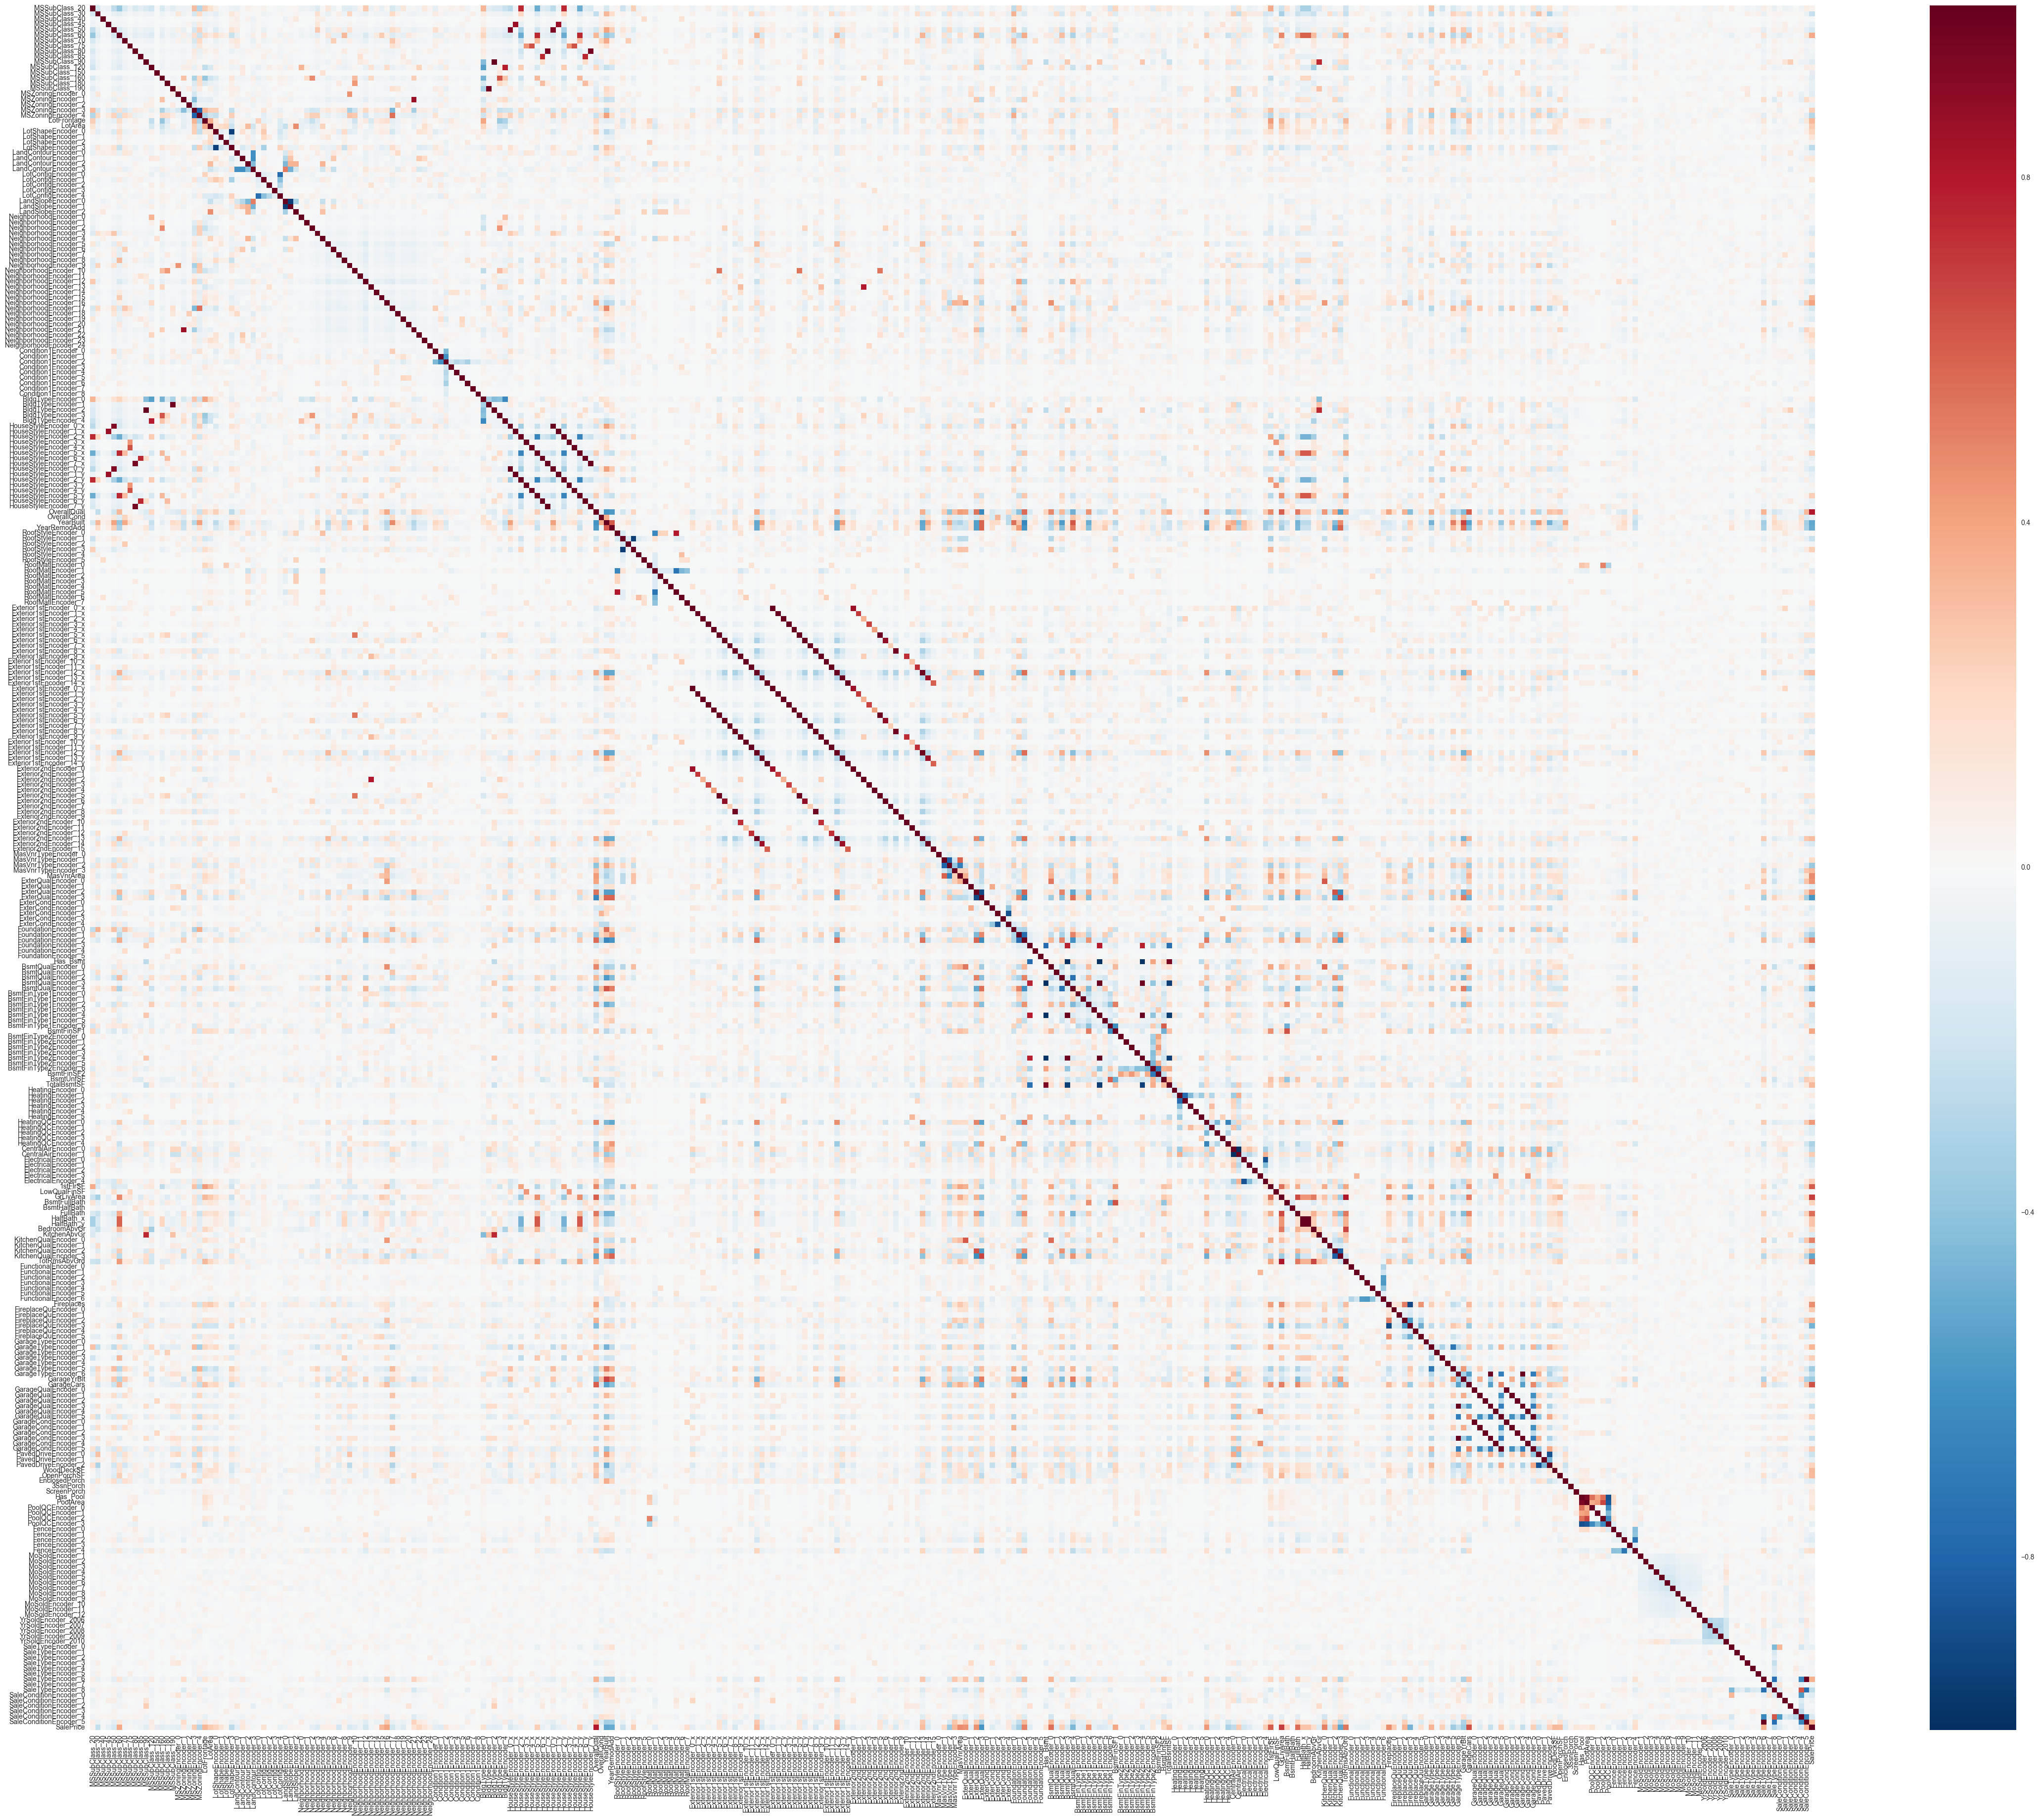

In [260]:
# 相关性检测
# correlation matrix
corrmat = process_df.corr()
f, ax = plt.subplots(figsize=(60, 45))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

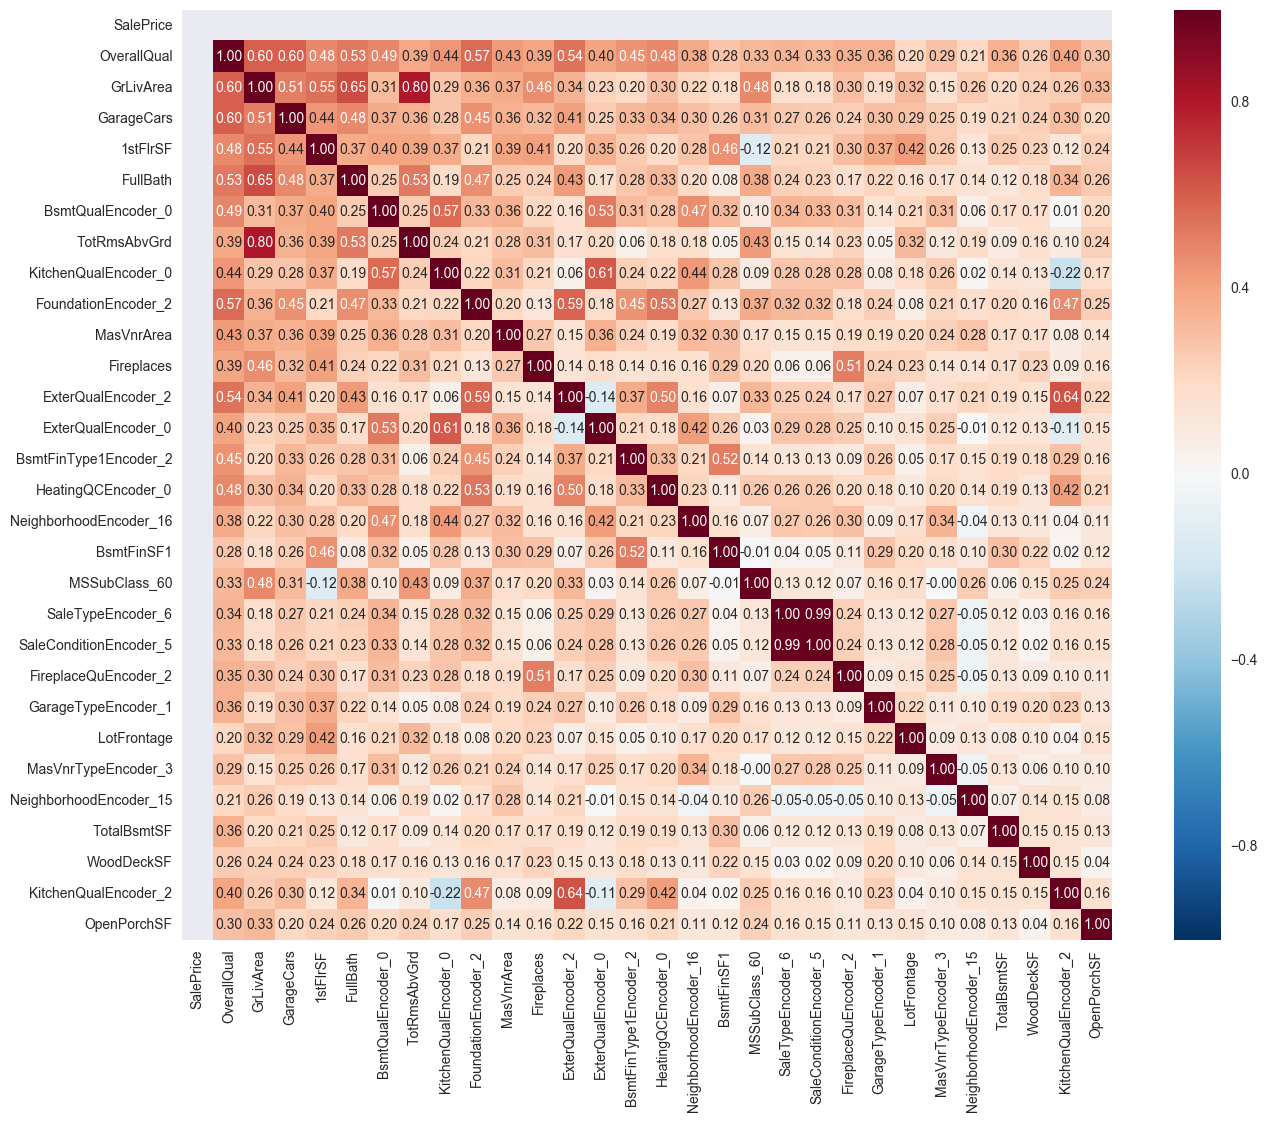

In [263]:
#saleprice correlation matrix
k = 30 #number of variables for heatmap
f, ax = plt.subplots(figsize=(16, 12))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(process_df[cols].values.T)
#sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [204]:
X_final_df = X_df.drop([524, 1299])

In [205]:
X_train_df = X_final_df.loc[1:1460]

In [206]:
X_test_df = X_final_df.loc[1461:2919]

In [207]:
#norm_y = preprocessing.scale(train_df['SalePrice'])


In [208]:
X_train_df.to_csv('../data/offline/X_train.csv', header = True, index=True)
X_test_df.to_csv('../data/offline/X_test.csv', header = True, index=True)


In [209]:
train_final_df = train_df.drop([524, 1299])
y_train_df =  np.log1p(train_final_df['SalePrice'])
y_train_df.to_csv('../data/offline/y_train.csv', header = True, index=True)